# Capstone project HR employee attrition using RandomForest

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing    
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\mahender\Downloads\project\HR_Employee_Attrition_Data.csv")

In [3]:
#checking the shape of data 
df.shape

(2940, 35)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
#checking the type of data in features
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
#Setting display options to ensure feature name visibility

pd.set_option('display.max_columns' , None )

# Exploratory data analysis

In [8]:
#droping the Employeenumber feature

df = df.drop(['EmployeeNumber'] , axis = 1 )

In [9]:
# Creating the target feature 

df['Target'] = np.where(df['Attrition'] == 'Yes' , 1 , 0)
df = df.drop(['Attrition'] ,axis = 1)

In [10]:
#Dividing the Dataset into Dependent(Target) and Independent variable

X = df.drop(['Target'] , axis = 1 )  
Y = df['Target']                        

In [11]:
# Getting the Attrition(event) rate

Y.mean()

0.16122448979591836

## Spliting features into numerical and categorical 

In [12]:
num = X.select_dtypes(include = 'number')
char = X.select_dtypes(include = 'object')

In [13]:
num.shape

(2940, 25)

In [14]:
char.shape

(2940, 8)

In [15]:
#checking the unique level in the features numerical data

def unique_level(x):                               
    x=x.value_counts().count()     
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_level(x)))
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
Age,43
DailyRate,886
DistanceFromHome,29
Education,5
EmployeeCount,1


In [16]:
S1 = df_value_counts.loc[df_value_counts['feature_levels'] <= 20]
index_list = S1.index
cat = num.loc[:,index_list]
cat.dtypes

Education                   int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [17]:
S2 = df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list = S2.index
num = num.loc[:,num_list]
num.dtypes

Age                  int64
DailyRate            int64
DistanceFromHome     int64
HourlyRate           int64
MonthlyIncome        int64
MonthlyRate          int64
TotalWorkingYears    int64
YearsAtCompany       int64
dtype: object

In [18]:
num.shape

(2940, 8)

In [19]:
char = pd.concat([char,cat] , axis = 1 , join = 'inner')
char.shape

(2940, 25)

In [20]:
char.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [21]:
num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany'],
      dtype='object')

# outlier detection 

In [22]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,11.279592,7.008163
std,9.133819,403.440447,8.105485,20.325969,4707.155770,7116.575021,7.779458,6.125483
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1372.260000,2324.170000,1.000000,0.000000
5%,24.000000,164.000000,1.000000,33.000000,2097.000000,3376.000000,1.000000,1.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8045.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,84.000000,8380.000000,20462.000000,15.000000,9.000000


In [23]:
#setting the limits for the data

def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.90))
    return(x)

In [24]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,11.279592,7.008163
std,9.133819,403.440447,8.105485,20.325969,4707.155770,7116.575021,7.779458,6.125483
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1372.260000,2324.170000,1.000000,0.000000
5%,24.000000,164.000000,1.000000,33.000000,2097.000000,3376.000000,1.000000,1.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8045.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,84.000000,8380.000000,20462.000000,15.000000,9.000000


In [25]:
num.shape

(2940, 8)

## Missing value analysis

In [26]:
num.isnull().mean()

Age                  0.0
DailyRate            0.0
DistanceFromHome     0.0
HourlyRate           0.0
MonthlyIncome        0.0
MonthlyRate          0.0
TotalWorkingYears    0.0
YearsAtCompany       0.0
dtype: float64

In [27]:
char.isnull().mean()

BusinessTravel              0.0
Department                  0.0
EducationField              0.0
Gender                      0.0
JobRole                     0.0
MaritalStatus               0.0
Over18                      0.0
OverTime                    0.0
Education                   0.0
EmployeeCount               0.0
EnvironmentSatisfaction     0.0
JobInvolvement              0.0
JobLevel                    0.0
JobSatisfaction             0.0
NumCompaniesWorked          0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsInCurrentRole          0.0
YearsSinceLastPromotion     0.0
YearsWithCurrManager        0.0
dtype: float64

In [28]:
char.dtypes

BusinessTravel              object
Department                  object
EducationField              object
Gender                      object
JobRole                     object
MaritalStatus               object
Over18                      object
OverTime                    object
Education                    int64
EmployeeCount                int64
EnvironmentSatisfaction      int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [29]:
char['Education']=char['Education'].astype('object')
char['EmployeeCount']=char['EmployeeCount'].astype('object')
char['EnvironmentSatisfaction']=char['EnvironmentSatisfaction'].astype('object')
char['JobInvolvement']=char['JobInvolvement'].astype('object')
char['JobLevel']=char['JobLevel'].astype('object')
char['JobSatisfaction']=char['JobSatisfaction'].astype('object')
char['NumCompaniesWorked']=char['NumCompaniesWorked'].astype('object')
char['PercentSalaryHike']=char['PercentSalaryHike'].astype('object')
char['PerformanceRating']=char['PerformanceRating'].astype('object')
char['RelationshipSatisfaction']=char['RelationshipSatisfaction'].astype('object')
char['StandardHours']=char['StandardHours'].astype('object')
char['StockOptionLevel']=char['StockOptionLevel'].astype('object')
char['TrainingTimesLastYear']=char['TrainingTimesLastYear'].astype('object')
char['WorkLifeBalance']=char['WorkLifeBalance'].astype('object')
char['YearsInCurrentRole']=char['YearsInCurrentRole'].astype('object')
char['YearsSinceLastPromotion']=char['YearsSinceLastPromotion'].astype('object')
char['YearsWithCurrManager']=char['YearsWithCurrManager'].astype('object')

In [30]:
char.dtypes

BusinessTravel              object
Department                  object
EducationField              object
Gender                      object
JobRole                     object
MaritalStatus               object
Over18                      object
OverTime                    object
Education                   object
EmployeeCount               object
EnvironmentSatisfaction     object
JobInvolvement              object
JobLevel                    object
JobSatisfaction             object
NumCompaniesWorked          object
PercentSalaryHike           object
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours               object
StockOptionLevel            object
TrainingTimesLastYear       object
WorkLifeBalance             object
YearsInCurrentRole          object
YearsSinceLastPromotion     object
YearsWithCurrManager        object
dtype: object

## zero variance analysis

In [31]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=0)
var.fit_transform(num)
col = var.get_support(indices=True)
num = num.iloc[:,col]
num.iloc[0]

Age                     41
DailyRate             1102
DistanceFromHome         1
HourlyRate              94
MonthlyIncome         5993
MonthlyRate          19479
TotalWorkingYears        8
YearsAtCompany           6
Name: 0, dtype: int64

In [32]:
num.dtypes

Age                  int64
DailyRate            int64
DistanceFromHome     int64
HourlyRate           int64
MonthlyIncome        int64
MonthlyRate          int64
TotalWorkingYears    int64
YearsAtCompany       int64
dtype: object

### Feature descretization - Numerical

In [33]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile') 
num_binned=pd.DataFrame(discrete.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Rank') 
num_binned.tail()

,Age_Rank,DailyRate_Rank,DistanceFromHome_Rank,HourlyRate_Rank,MonthlyIncome_Rank,MonthlyRate_Rank,TotalWorkingYears_Rank,YearsAtCompany_Rank
2935,5.0,5.0,8.0,1.0,1.0,4.0,7.0,4.0
2936,6.0,3.0,3.0,1.0,8.0,7.0,4.0,5.0
2937,1.0,0.0,2.0,8.0,6.0,1.0,2.0,4.0
2938,8.0,6.0,1.0,4.0,5.0,4.0,7.0,6.0
2939,4.0,3.0,4.0,7.0,4.0,3.0,2.0,3.0


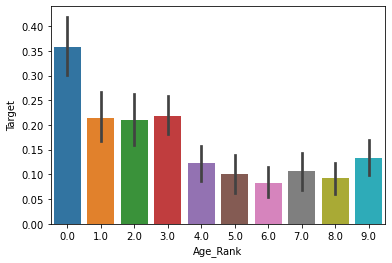

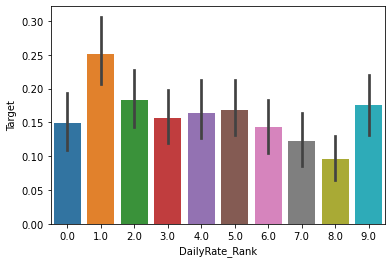

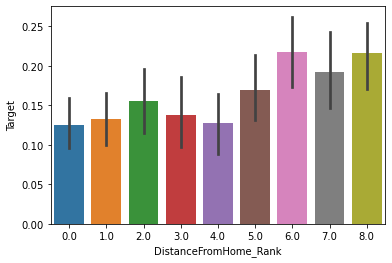

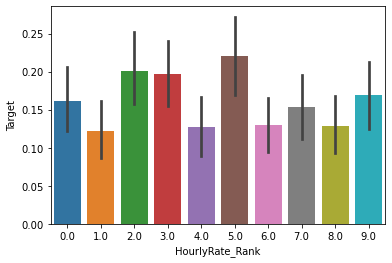

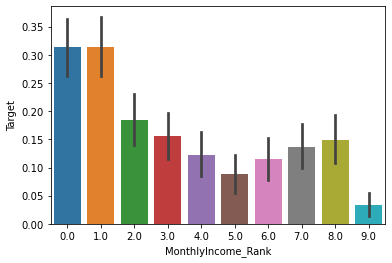

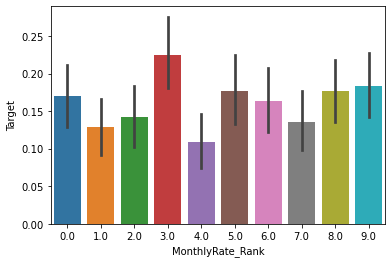

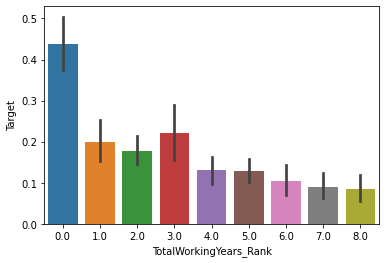

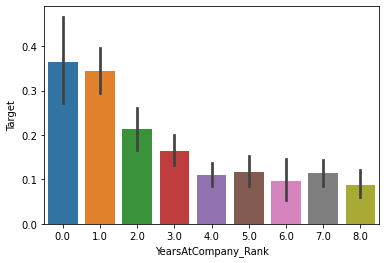

In [34]:
#Getting the bar plot between numerical and target

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in num_binned.columns:
    plt.figure()
    sns.barplot(x=col, y="Target",data=X_bin_combined, estimator=mean )
plt.show()

## Insights

In [35]:
#Droping these columns

#Dailyrate = we should drop this feature it is not a good estimator because it doesnt effect the target
#HourlyRate = most the ranks are below the avverage Attrition rate so we drop this feature
#MonthlyRate = most the ranks are below the avverage Attrition rate so we drop this feature

In [36]:
lst = ['DailyRate' , 'HourlyRate' , 'MonthlyRate']
num = num.drop(lst,axis=1)

In [37]:
num.dtypes

Age                  int64
DistanceFromHome     int64
MonthlyIncome        int64
TotalWorkingYears    int64
YearsAtCompany       int64
dtype: object

### Feature descretization - Categorical

In [38]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x : unique_levels(x)))
char_unique_levels.columns=['feature_levels']
char_unique_levels

,feature_levels
BusinessTravel,3
Department,3
EducationField,6
Gender,2
JobRole,9
MaritalStatus,3
Over18,1
OverTime,2
Education,5
EmployeeCount,1


In [39]:
S3 = char_unique_levels.loc[char_unique_levels['feature_levels']>1]
lst3 = S3.index
char = char.loc[:,lst3]

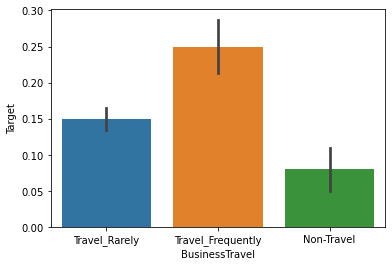

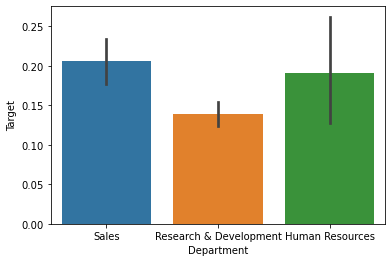

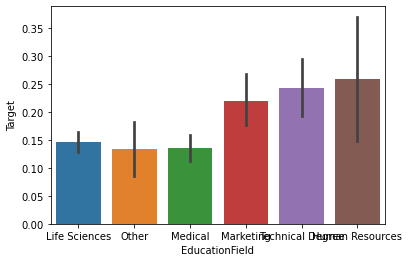

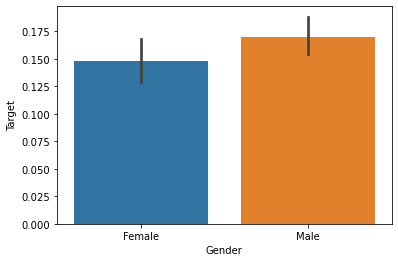

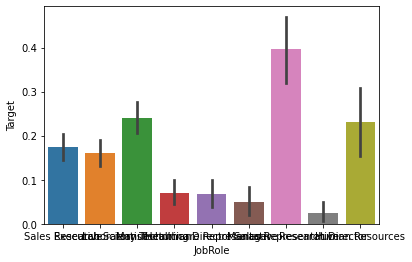

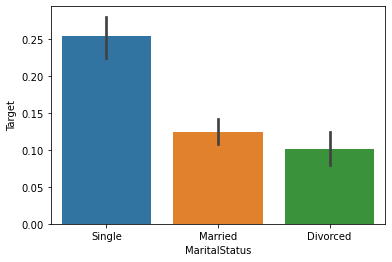

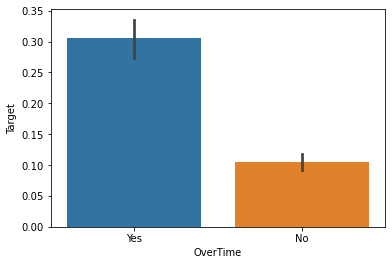

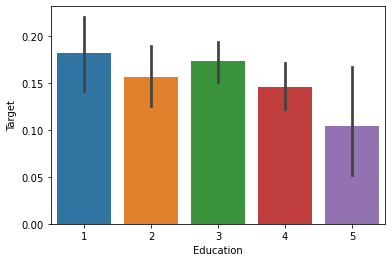

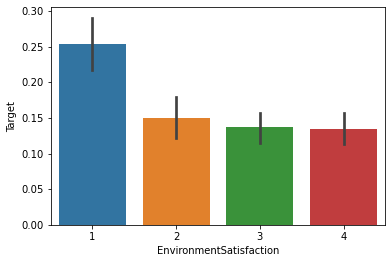

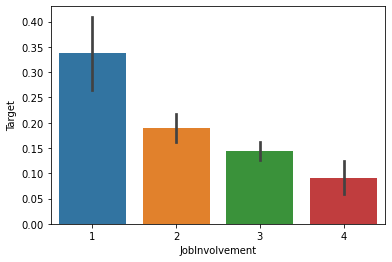

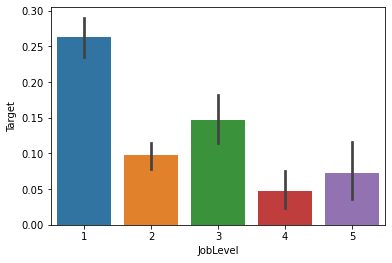

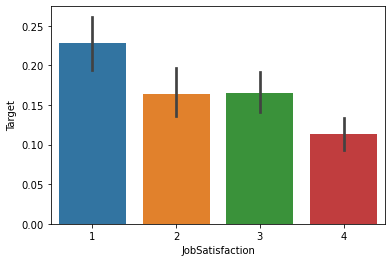

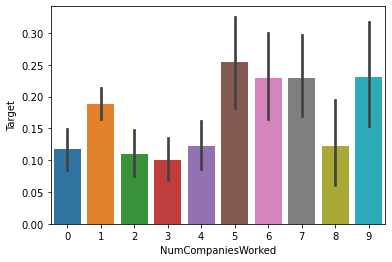

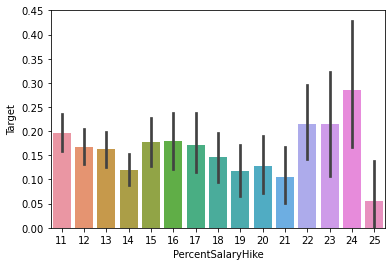

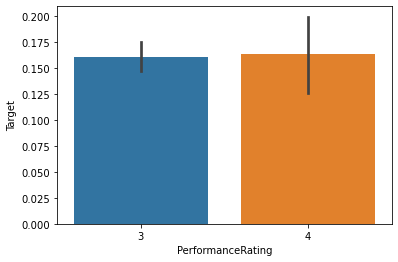

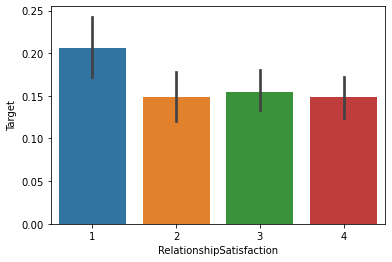

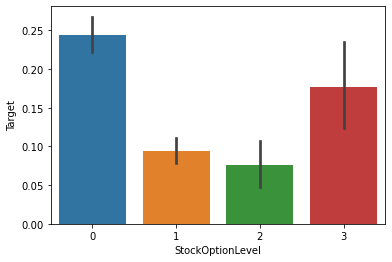

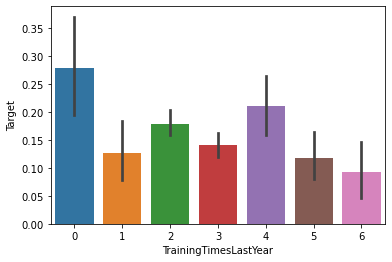

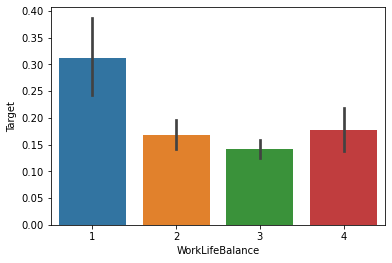

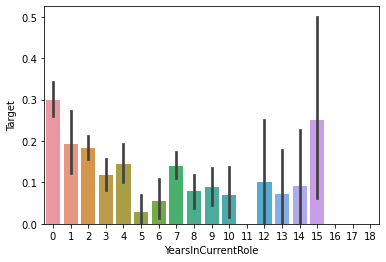

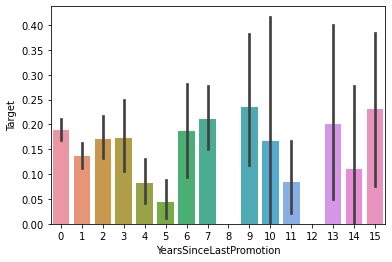

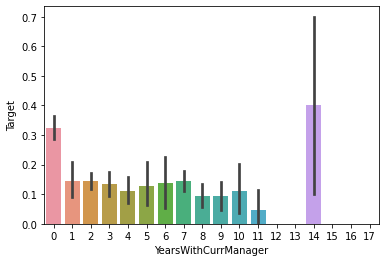

In [40]:
#Getting the bar plot between categorical and target

import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="Target",data=X_char_merged, estimator=mean )
plt.show()

## Insights


In [41]:
#Education,Gender,PerformanceRating are the those feature which are not affecting the Target variable.

In [42]:
charlst = ['Education','Gender','PerformanceRating']
char = char.drop(charlst,axis=1)

In [43]:
## Create dummy features with n-1 levels
char = pd.get_dummies(char,drop_first= True)
char.shape

(2940, 121)

In [44]:
# Select K Best for Categorical Features

from sklearn.feature_selection import SelectKBest, chi2
sel = SelectKBest(chi2, k=110)
sel.fit_transform(char, Y)
col = sel.get_support(indices=True)
char = char.iloc[:,col]

In [45]:
#concat the numerical and categorocal and make a dataframe X_all
X_all = pd.concat([num,char],axis=1,join='inner')
X_all.shape

(2940, 115)

## Dividing the data into Train and Test Split

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_all,Y,test_size=0.2,random_state=42)

In [47]:
print("shape of the training data" , X_train.shape)
print("shape of the test data" , X_test.shape)
print("Attrition in training data" , Y_train.mean())
print("Attrition in testing data " , Y_test.mean())

shape of the training data (2352, 115)
shape of the test data (588, 115)
Attrition in training data 0.15943877551020408
Attrition in testing data  0.1683673469387755


## Model Building

### 1. Decision Tree Model

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=20) 

In [49]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 4, 5], 'min_samples_split': [50,120,180,200,250] , 'min_samples_leaf':[6,8,10,12,14] }  
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)            
tree_grid.fit(X_train,Y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 14, 'min_samples_split': 50}


In [50]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=20,max_depth=4,min_samples_split=50,min_samples_leaf=14)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=14, min_samples_split=50,
                       random_state=20)

In [51]:
dtree_score_train = dtree.score(X_train,Y_train)
print("training score " , dtree_score_train)
dtree_score_test = dtree.score(X_test,Y_test)
print("testing score" , dtree_score_test)

training score  0.8664965986394558
testing score 0.8605442176870748


### 2.Random Forest model

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=20,max_depth=4,min_samples_split=50)
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=4, min_samples_split=50, random_state=20)

## Model Evaluation

In [53]:
Y_pred_tree=dtree.predict(X_test)
Y_pred_rf=rf.predict(X_test)

### for desicion tree

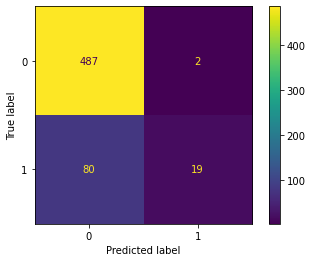

In [54]:
metrics.plot_confusion_matrix(dtree,X_test,Y_test)

In [56]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_tree))
print("Precision",metrics.precision_score(Y_test,Y_pred_tree))
print("Recall",metrics.recall_score(Y_test,Y_pred_tree))
print("f1_score",metrics.f1_score(Y_test,Y_pred_tree))

Accuracy: 0.8605442176870748
Precision 0.9047619047619048
Recall 0.1919191919191919
f1_score 0.31666666666666665


### for random forest

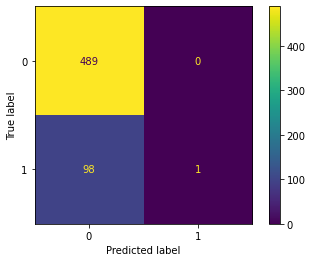

In [57]:
metrics.plot_confusion_matrix(rf,X_test , Y_test)

In [58]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_rf))
print("Precision",metrics.precision_score(Y_test,Y_pred_rf))
print("Recall",metrics.recall_score(Y_test,Y_pred_rf))
print("f1_score",metrics.f1_score(Y_test,Y_pred_rf))

Accuracy: 0.8333333333333334
Precision 1.0
Recall 0.010101010101010102
f1_score 0.02


## Importance of the Feature

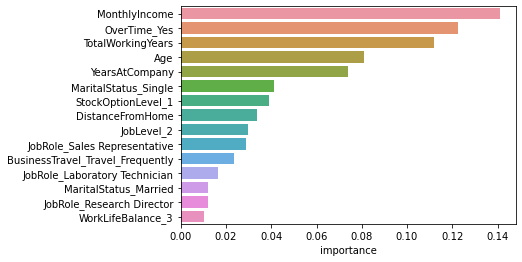

In [59]:
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)


ax=sns.barplot(x='importance',y=feature_importances.iloc[0:15].index,data=feature_importances.iloc[0:15])

## Insights

In [ ]:
"The top three important features which affect the target the most are following"

# 1.MonthlyIncome
# 2.OverTime_yes
# 3.Totalworkingyears

"The least three important are" 

# 1.WorklifeBalance_3
# 2.JobRole_ResearchDirector
# 3.MaritalStatus_Married